In [2]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [4]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [5]:
# 한글 폰트 사용시 레이블의 '-' 기호 깨지는 현상 해결
plt.rc('axes', unicode_minus = False)  # plt.rcParams['axes.unicode_minus'] = False와 동일

### Pandas를 활용한 기온 데이터 <hr>
- 누락값(NaN) 처리
    - dropna(axis) : 누락값 제거  
    => axis = 0 : Nan이 포함된 행 제거  
    => axis = 1 : Nan이 포함된 열 제거
    - fillna(0) : 누락값을 0으로 변경
    - fillna(method = 'ffill') : 이전 값으로 변경 (forward fill)
    - fillna(method = 'bfill') : 이후 값으로 변경 (backwark fill)
    - interpolate() : 누락값 양쪽의 값으로 중간값 계산

#### Pandas의 read_csv() 함수 호출

In [6]:
import pandas as pd

data_file = '../DATA/daegu-utf8.csv'
weather_df = pd.read_csv(data_file, encoding = 'utf-8-sig')
print(weather_df.columns)
print(weather_df['날짜'].dtype)  # 날짜 컬럼은 object 타입

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')
object


#### DataFrame의 column 이름 변경 :특수 문자(최고기온(℃)) 제거

In [7]:
weather_df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']
weather_df.columns

Index(['날짜', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')

#### '날짜' 컬럼의 데이터 타입을 datetime 타입으로 변경

In [8]:
weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format = '%Y-%m-%d')
print(weather_df['날짜'].dtype)

datetime64[ns]


#### 누락값 개수 구하기

In [9]:
print(weather_df.head(5))
print(weather_df.shape)
num_rows = weather_df.shape[0]  # shape(row, col), shape[0] : row의 개수
num_missing = num_rows - weather_df.count()  # count() :정상값의 개수
print(num_missing)

          날짜   지점  평균기온  최저기온  최고기온
0 1907-01-31  143   NaN  -7.0   0.8
1 1907-02-01  143   NaN   NaN   NaN
2 1907-02-02  143   NaN   NaN   NaN
3 1907-02-03  143   NaN   NaN   NaN
4 1907-02-04  143   NaN   NaN   NaN
(42704, 5)
날짜        0
지점        0
평균기온    703
최저기온    629
최고기온    630
dtype: int64


### 누락값(NaN) 처리

In [10]:
weather_df = weather_df.dropna(axis = 0)
print(weather_df.count())
print(weather_df.head(5))

날짜      41999
지점      41999
평균기온    41999
최저기온    41999
최고기온    41999
dtype: int64
            날짜   지점  평균기온  최저기온  최고기온
701 1909-01-01  143  -4.1  -8.0   0.1
702 1909-01-02  143  -0.8  -6.7   6.1
703 1909-01-03  143   1.0  -2.4   3.6
704 1909-01-04  143   4.2   0.0   9.2
705 1909-01-05  143   3.4  -0.4   9.0


#### 누락값을 제거한 최종 데이터프레임을 csv파일로 저장
- index = False : 인덱스 항목 저장 안함
- encoding = 'utf-8-sig' (euc_kr이 아닌 utf-8로 저장)

In [11]:
weather_df.to_csv('daegu-utf8-df.csv', index = False, mode = 'w', encoding = 'utf-8-sig')

### 특정 연도와 달의 최고기온 및 최저기온 평균값 계산 <hr>
- 해당연도와 달의 DataFrame 가져오기
- datetime 객체 접근 - dt.year, dt.month, dt.day

In [12]:
year_df = weather_df[weather_df['날짜'].dt.year == 2023]
month_df = year_df[year_df['날짜'].dt.month == 8]
month_df.head()

,날짜,지점,평균기온,최저기온,최고기온
42551,2023-08-01,143,29.7,24.9,34.8
42552,2023-08-02,143,30.0,23.9,34.7
42553,2023-08-03,143,31.5,27.0,37.7
42554,2023-08-04,143,30.5,26.0,34.7
42555,2023-08-05,143,31.5,25.7,37.2


In [13]:
max_temp_mean = round(month_df['최고기온'].mean(), 1)
min_temp_mean = round(month_df['최저기온'].mean(), 1)
print(f'2023년 8월 최저기온 평균 : {min_temp_mean}, 최고기온 평균 : {max_temp_mean}')

2023년 8월 최저기온 평균 : 24.0, 최고기온 평균 : 31.9


#### 1990년대와 2010년대 최고 기온 비교 <hr>

In [14]:
def draw_two_plots(title, x_data, max_temp_list1, label_y1, max_temp_list2, label_y2):
    plt.figure(figsize = (10, 4))
    plt.plot(x_data, max_temp_list1, marker = 's', markersize = 6, color = 'b', label = label_y1)
    plt.plot(x_data, max_temp_list2, marker = 's', markersize = 6, color = 'r', label = label_y2)
    plt.xticks(x_data)

    plt.title(title)
    plt.legend()
    plt.show()

1990년대 8월 최고기온 평균 : [33.9, 28.3, 29.0, 27.0, 34.5, 34.0, 32.3, 30.9, 30.1, 29.1]
2010년대 8월 최고기온 평균 : [33.6, 30.3, 32.4, 34.4, 28.8, 31.2, 33.2, 31.4, 32.9, 32.2]
1990년대 8월 전체 최고 기온 평균 : 30.9
2010년대 8월 전체 최고 기온 평균 : 32.0


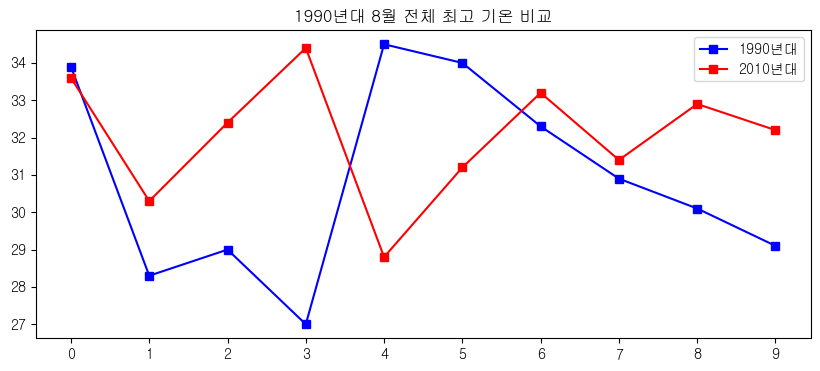

In [16]:
def main():
    search_month = int(input('달을 입력하세요 : '))

    data_file = '../DATA/daegu-utf8-df.csv'
    weather_df = pd.read_csv(data_file, encoding = 'utf-8-sig')
    weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format = '%Y-%m-%d')
    first_decade_max_temp_list = [0] * 10
    second_decade_max_temp_list = [0] * 10

    first_decade = 1990
    second_decade = 2010

    for year in range(10):
        first_decade_df = weather_df[(weather_df['날짜'].dt.year == first_decade + year) & (weather_df['날짜'].dt.month == search_month)]
        first_decade_max_temp_list[year] = round(first_decade_df['최고기온'].mean(),1)
        second_decade_df = weather_df[(weather_df['날짜'].dt.year == second_decade + year) & (weather_df['날짜'].dt.month == search_month)]
        second_decade_max_temp_list[year] = round(second_decade_df['최고기온'].mean(), 1)

    print(f'{first_decade}년대 {search_month}월 최고기온 평균 : {first_decade_max_temp_list}')
    print(f'{second_decade}년대 {search_month}월 최고기온 평균 : {second_decade_max_temp_list}')

    first_decade_high_temp_mean = round(sum(first_decade_max_temp_list) / len(first_decade_max_temp_list), 1)
    second_decade_high_temp_mean = round(sum(second_decade_max_temp_list) / len(second_decade_max_temp_list), 1)

    print(f'{first_decade}년대 {search_month}월 전체 최고 기온 평균 : {first_decade_high_temp_mean}')
    print(f'{second_decade}년대 {search_month}월 전체 최고 기온 평균 : {second_decade_high_temp_mean}')
    
    x_data = [i for i in range(10)]
    draw_two_plots(f'{first_decade}년대 {search_month}월 전체 최고 기온 비교', x_data, first_decade_max_temp_list, str(first_decade) +'년대', second_decade_max_temp_list, str(second_decade) + '년대')

main()
